In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras import initializers, regularizers
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test =  to_categorical(y_train), to_categorical(y_test)


def create_model(activation="relu", dropout_rate=0.3, regularizer=None, initializer=None):
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512,activation=activation, kernel_regularizer=regularizer,
                     kernel_initializer=initializer,),
        layers.Dense(256,activation=activation, kernel_regularizer=regularizer,
                     kernel_initializer=initializer,),
        layers.Dense(128,activation=activation, kernel_regularizer=regularizer,
                     kernel_initializer=initializer,),
        layers.Dense(64 ,activation=activation, kernel_regularizer=regularizer,
                     kernel_initializer=initializer,),
        layers.Dense(32 ,activation=activation, kernel_regularizer=regularizer,
                     kernel_initializer=initializer,),
        layers.Dense(10, activation='softmax')
    ])
    return model

xavior  = initializers.glorot_normal()
kamming = initializers.he_normal()


regularizer = regularizers.l2(0.001)

xavior_model = create_model(activation='sigmoid', regularizer=regularizer, initializer=xavior)
xavior_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

kamming_model = create_model(activation='relu', regularizer=regularizer, initializer=kamming)
kamming_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

x_history = xavior_model.fit(x_train, y_train, epochs=25,
                                   batch_size=64,
                                   validation_data=(x_test, y_test))

k_history = kamming_model.fit(x_train, y_train, epochs=25,
                                   batch_size=64,
                                   validation_data=(x_test, y_test))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1002 - loss: 2.5412 - val_accuracy: 0.1000 - val_loss: 2.3203
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0990 - loss: 2.3178 - val_accuracy: 0.1000 - val_loss: 2.3118
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0980 - loss: 2.3099 - val_accuracy: 0.1000 - val_loss: 2.3081
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1013 - loss: 2.3069 - val_accuracy: 0.1000 - val_loss: 2.3052
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0988 - loss: 2.3057 - val_accuracy: 0.1000 - val_loss: 2.3073
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0993 - loss: 2.3058 - val_accuracy: 0.1000 - val_loss: 2.3045
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0968 - loss: 2.3057 - val_accuracy: 0.1000 - val_loss: 2.3041
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1004 - loss: 2.3055 - val_accuracy: 

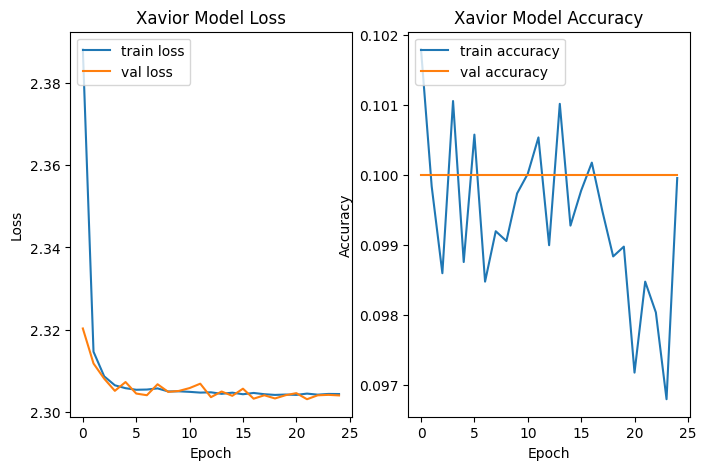

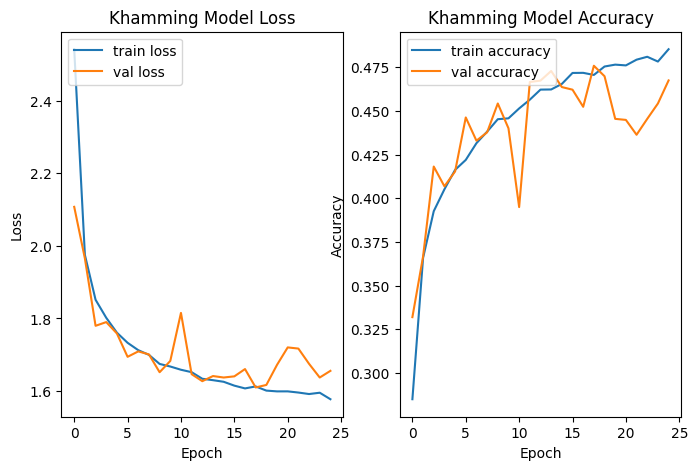

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))
ax[0].plot(x_history.history['loss'], label='train loss')
ax[0].plot(x_history.history['val_loss'], label='val loss')
ax[0].set_title('Xavior Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper left')

ax[1].plot(x_history.history['accuracy'], label='train accuracy')
ax[1].plot(x_history.history['val_accuracy'], label='val accuracy')
ax[1].set_title('Xavior Model Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper left')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(8, 5))
ax[0].plot(k_history.history['loss'], label='train loss')
ax[0].plot(k_history.history['val_loss'], label='val loss')
ax[0].set_title('Khamming Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper left')

ax[1].plot(k_history.history['accuracy'], label='train accuracy')
ax[1].plot(k_history.history['val_accuracy'], label='val accuracy')
ax[1].set_title('Khamming Model Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper left')

plt.show()